#Welcome
<h1><center>Exploring Machine Learning Models</center></h1><br>

Predecting Ghouls : This is part of my project submission (Machine learning). As part of this Project, I took the Ghouls data set and applied different andvanced algorithm to find the best fit.

<h1><center>INDEX</center></h1><br>

1. [Importing all required Libraries](#s1)
2. [Preprofiling of the Training DataSet](#s2)
3. [Playing with Plottly - Visualization](#s3) <br>
3 1. [Display data in the Tabler form](#s4) <br>
3 2. [Scatter plot](#s5)<br>
3 3. [Heat map](#s6)<br>
3 4. [Scatter Pairplot](#s7)<br>
4. [Loading Trainig Dataset and verifying](#s8)
5. [Loading Test Dataset and verifying](#s9)
6. [Working with different ML Algorithms](#s10)<br>
6 1. [Preparing Train Test](#s11)<br>
6 2. [Auto ML - TPOT](#s12)<br>
6 3. [Diff models : Logistic, RandomForest, SVC, Bagging, Voting](#s13)
7. [Conclusion](#s14)


# 1 Importing all required Libraries <a name = "s1"></a>

In [0]:
!pip install tpot

     |████████████████████████████████| 901kB 6.3MB/s 
     |████████████████████████████████| 153kB 47.6MB/s 
     |████████████████████████████████| 61kB 7.4MB/s 
  Created wheel for tpot: filename=TPOT-0.11.0-cp36-none-any.whl size=75684 sha256=66c514e444fa2831b8afba1958e29f42a525c1a389198cd715d1b8a79f09c350
  Stored in directory: /root/.cache/pip/wheels/5e/79/3b/49ccea9a29f28d0cdecbca22d71515c23bf45e1e65bc925cb8
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11955 sha256=9ab711e496784ff2a386c6aa4641bcf7eda9e90437f62328e05170242192f243
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built tpot stopit
  Found existing installation: tqdm 4.28.1
    Uninstalling tqdm-4.28.1:
      Successfully uninstalled tqdm-4.28.1


In [0]:

import pandas_profiling
# import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline
sns.set()
import plotly.graph_objects as go
import plotly.express as px
from subprocess import check_output
import warnings
warnings.filterwarnings('ignore')

#library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import random as rnd

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

# Importing Models
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# Importing other tools
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, classification_report, make_scorer
from sklearn.metrics import accuracy_score, recall_score, precision_recall_curve
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV


# 2 Preprofiling of the Training Dataset<a name = "s2"></a>

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/SudhakarAnemu/Term-4/master/Projects/Ghouls_train.csv', index_col=0)
profile = pandas_profiling.ProfileReport(data)
profile.to_file(outputfile="jsghoulstrain.html")

# 3 Playing with Plottly<a name = "s3"></a>

## 3.1 Display data in the table form<a name = "s4"></a>

In [0]:
plotty_df = pd.read_csv('https://raw.githubusercontent.com/SudhakarAnemu/Term-4/master/Projects/Ghouls_train.csv', index_col=0)

fig = go.Figure(data=[go.Table(
    header=dict(values=list(plotty_df.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[plotty_df.bone_length, plotty_df.rotting_flesh, plotty_df.hair_length, plotty_df.has_soul, plotty_df.color, plotty_df.type],
               fill_color='lavender',
               align='left'))
])

fig.show()

## 3.2 Scatter plot<a name = "s5"></a>

In [0]:
fig = px.scatter(plotty_df, x="bone_length", y="rotting_flesh", color="type",
                 size='bone_length', hover_data=['rotting_flesh'])
fig.show()

## 3.3 Heatmap<a name = "s6"></a>

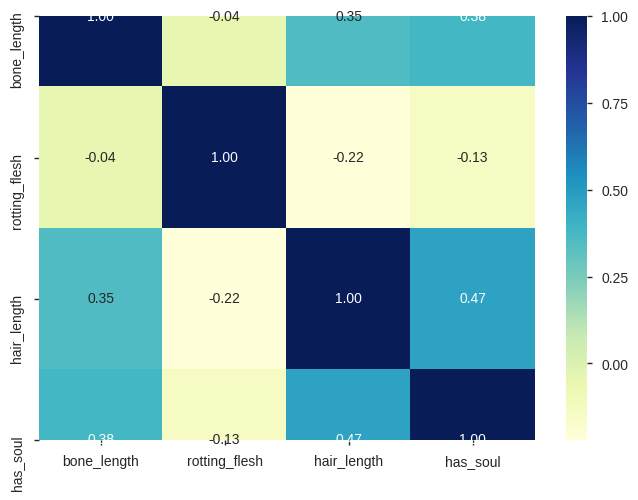

In [0]:
sns.heatmap(plotty_df.corr(), annot = True, fmt = ".2f", cmap = 'YlGnBu')

In [0]:
fig = go.Figure(data=go.Heatmap(
                   z=plotty_df.corr(),
                   x=['bone_length', 'rotting_flesh', 'hair_length', 'has_soul'],
                   y=['bone_length', 'rotting_flesh', 'hair_length', 'has_soul']))
fig.show()

## 3.4 Scatter Pairplot<a name = "s7"></a>

In [0]:
fig = px.scatter_matrix(plotty_df,
    dimensions=["bone_length", "rotting_flesh", "hair_length", "has_soul", "color", "type"],
    color="color", symbol="color",
    title="Scatter matrix of Ghouls data set",
    labels={col:col.replace('_', ' ') for col in plotty_df.columns}) # remove underscore
fig.update_traces(diagonal_visible=False)
fig.show()


# 4 Load Training Dataset and verifying<a name = "s8"></a>

## 4.1 Loading the Train Dataset

In [0]:
df_trnng = pd.read_csv('https://raw.githubusercontent.com/SudhakarAnemu/Term-4/master/Projects/Ghouls_train.csv', index_col=0)

## 4.2 View the sample data

In [0]:
df_trnng.head(10)

,bone_length,rotting_flesh,hair_length,has_soul,color,type
id,,,,,,
0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
5,0.566117,0.875862,0.418594,0.636438,green,Ghost
7,0.405680,0.253277,0.441420,0.280324,green,Goblin
8,0.399331,0.568952,0.618391,0.467901,white,Goblin
11,0.516224,0.536429,0.612776,0.468048,clear,Ghoul
12,0.314295,0.671280,0.417267,0.227548,blue,Ghost


## 4.3 Verifying properties of the DataSet
a. Only 371 rows and 6 columns<br>
b. No null, Data looks clear and good. 


In [0]:
print(150*'*')
print("Shape of the Dataset : ", df_trnng.shape)
print(150*'-')
print("Columns : ", df_trnng.columns)
print(150*'&')
print("Info of the Dataset : ", df_trnng.info())
print(150*'^')
print("Description of the Dataset : ", df_trnng.describe())
print(150*'%')
print("Verify the count of Null", df_trnng.isnull().sum())

******************************************************************************************************************************************************
Shape of the Dataset :  (371, 6)
------------------------------------------------------------------------------------------------------------------------------------------------------
Columns :  Index(['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'color',
       'type'],
      dtype='object')
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 0 to 897
Data columns (total 6 columns):
bone_length      371 non-null float64
rotting_flesh    371 non-null float64
hair_length      371 non-null float64
has_soul         371 non-null float64
color            371 non-null object
type             371 non-null object
dtypes: float64(4), object(2)
memory usage: 20.3+ KB
Info of

## 4.4 Verifying Unique values of each feature

In [0]:
colList = ['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'color',
       'type']
count=1
for i in range(0,len(colList)):
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Start {} ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n".format(count))
    print("S.No :", count, "Name of the column : ",colList[i])
    print(df_trnng[colList[i]].unique())
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~End~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
    count = count + 1
print("End of For")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Start 1 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

S.No : 1 Name of the column :  bone_length
[0.35451218 0.57555991 0.4678755  0.77665246 0.5661166  0.40567974
 0.39933085 0.5162239  0.31429528 0.28094174 0.43168521 0.58454323
 0.39071213 0.35155867 0.51338722 0.50019655 0.25077    0.58555932
 0.60583596 0.52408038 0.50316406 0.47260329 0.37444857 0.34334961
 0.6872555  0.2290099  0.38850055 0.4924381  0.41166269 0.30419779
 0.67297706 0.46509395 0.5545096  0.52372856 0.55819608 0.45637104
 0.3949582  0.63634677 0.56428176 0.2880501  0.4151097  0.45693516
 0.53426635 0.38495798 0.31414288 0.28719319 0.48171636 0.26814129
 0.36288711 0.29522914 0.57161877 0.49546706 0.44513172 0.62765237
 0.39725803 0.67851874 0.30430153 0.51527498 0.50423649 0.51267669
 0.62241365 0.20862517 0.75350514 0.49098777 0.66543197 0.60963426
 0.42496899 0.64417555 0.31141822 0.22753209 0.31527603 0.39076916
 0.34899142 0.51024217 0.5861773  0.480836   0.49833638 0.23704

# 5 Load Test Dataset and verifying<a name = "s9"></a>
a. No Null - Data looks clean<br>
b. 529 rows and 5 columns. Not much data. <br>
c. color is String rest all are float. <br>

## 5.1 Loading the Test Dataset

In [0]:
df_test = pd.read_csv('https://raw.githubusercontent.com/SudhakarAnemu/Term-4/master/Projects/Ghouls_test.csv', index_col=0)

## 5.2 View the sample data

In [0]:
df_test.head(10)

,bone_length,rotting_flesh,hair_length,has_soul,color
id,,,,,
3,0.471774,0.387937,0.706087,0.698537,black
6,0.427332,0.645024,0.565558,0.451462,white
9,0.549602,0.491931,0.660387,0.449809,black
10,0.638095,0.682867,0.471409,0.356924,white
13,0.361762,0.583997,0.377256,0.276364,black
14,0.292890,0.505851,0.297927,0.106263,white
15,0.584456,0.551680,0.628330,0.499118,white
16,0.485525,0.459242,0.657735,0.565337,blue
17,0.471757,0.407916,0.465992,0.406608,blue


## 5.3 Verifying properties of the DataSet

In [0]:
print(150*'*')
print("Shape of the Dataset : ", df_test.shape)
print(150*'-')
print("Columns : ", df_test.columns)
print(150*'&')
print("Info of the Dataset : ", df_test.info())
print(150*'^')
print("Description of the Dataset : ", df_test.describe())
print(150*'%')
print("Verify the count of Null", df_test.isnull().sum())

******************************************************************************************************************************************************
Shape of the Dataset :  (529, 5)
------------------------------------------------------------------------------------------------------------------------------------------------------
Columns :  Index(['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'color'], dtype='object')
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
<class 'pandas.core.frame.DataFrame'>
Int64Index: 529 entries, 3 to 899
Data columns (total 5 columns):
bone_length      529 non-null float64
rotting_flesh    529 non-null float64
hair_length      529 non-null float64
has_soul         529 non-null float64
color            529 non-null object
dtypes: float64(4), object(1)
memory usage: 24.8+ KB
Info of the Dataset :  None
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

## 5.4 Verifying Unique values of each feature

In [0]:
colList = ['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'color']
count=1
for i in range(0,len(colList)):
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Start {} ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n".format(count))
    print("S.No :", count, "Name of the column : ",colList[i])
    print(df_test[colList[i]].unique())
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~End~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
    count = count + 1
print("End of For")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Start 1 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

S.No : 1 Name of the column :  bone_length
[0.47177445 0.42733226 0.54960189 0.63809497 0.36176224 0.29288979
 0.5844563  0.48552486 0.47175703 0.57295272 0.32054195 0.41370167
 0.13561463 0.45761825 0.62813795 0.512685   0.3795028  0.25005776
 0.3531753  0.44785044 0.50302544 0.59512034 0.2843703  0.47466639
 0.44345637 0.39413901 0.63267462 0.57175411 0.55625517 0.52434251
 0.55462597 0.5879726  0.69048817 0.34676147 0.29845563 0.54973996
 0.3914291  0.50896384 0.55363971 0.46310575 0.35133718 0.41146807
 0.46078682 0.37323849 0.26515051 0.52893593 0.44746139 0.31076147
 0.48812603 0.43488978 0.42185195 0.48466842 0.32712863 0.36466695
 0.2684484  0.29489166 0.46904802 0.3110659  0.56001675 0.49810797
 0.60084221 0.51973319 0.35159979 0.52072191 0.56785447 0.57152373
 0.39895482 0.22304733 0.56042508 0.58318786 0.56676555 0.42745694
 0.58797863 0.70767715 0.51334382 0.61304719 0.40035406 0.52515

# 6 Wokring with different ML Alogorithm's<a name = "s10"></a>

## 6.1 Preparing Xtrain, Xtest, ytrain and ytest<a name = "s11"></a>

In [0]:
df_trnng.head(5)

,bone_length,rotting_flesh,hair_length,has_soul,color,type
id,,,,,,
0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [0]:
df = pd.get_dummies(df_trnng.drop('type', axis = 1))

In [0]:
df.head(5)

,bone_length,rotting_flesh,hair_length,has_soul,color_black,color_blood,color_blue,color_clear,color_green,color_white
id,,,,,,,,,,
0,0.354512,0.350839,0.465761,0.781142,0,0,0,1,0,0
1,0.575560,0.425868,0.531401,0.439899,0,0,0,0,1,0
2,0.467875,0.354330,0.811616,0.791225,1,0,0,0,0,0
4,0.776652,0.508723,0.636766,0.884464,1,0,0,0,0,0
5,0.566117,0.875862,0.418594,0.636438,0,0,0,0,1,0


In [0]:
X_train, X_test, y_train, y_test = train_test_split(df, df_trnng['type'], test_size = 0.25, random_state = 0)
print("X_train : shape : ", X_train.shape)
print("X_test : shape : ", X_test.shape)
print("y_train : shape : ", y_train.shape)
print("y_test : shape : ", y_test.shape)

X_train : shape :  (278, 10)
X_test : shape :  (93, 10)
y_train : shape :  (278,)
y_test : shape :  (93,)


In [0]:
X_train.head(5)

,bone_length,rotting_flesh,hair_length,has_soul,color_black,color_blood,color_blue,color_clear,color_green,color_white
id,,,,,,,,,,
641,0.622371,0.385204,0.308995,0.295509,0,0,0,0,0,1
558,0.518231,0.494491,0.545443,0.600393,1,0,0,0,0,0
462,0.208885,0.399537,0.421704,0.216800,1,0,0,0,0,0
534,0.469020,0.621063,0.641631,0.598485,0,0,0,0,0,1
732,0.534001,0.595992,0.850140,0.794247,0,0,0,0,1,0


In [0]:
y_train.head(5)

id
641     Ghost
558     Ghoul
462     Ghost
534    Goblin
732     Ghoul
Name: type, dtype: object

## 6.2 TPOT - AutoML <a name = "s12"></a>
<br>Suggesiton 1 : 
<br>Best pipeline: 
<br>1. LinearSVC(RFE(input_matrix, criterion=gini, max_features=0.05, n_estimators=100, step=0.45), C=15.0, dual=True, loss=squared_hinge, penalty=l2, tol=0.1)
<br>2. LogisticRegression(SelectFwe(RobustScaler(input_matrix), alpha=0.042), C=15.0, dual=False, penalty=l1)
<br>3. LogisticRegression(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), C=20.0, dual=False, penalty=l2)
<br>4. LogisticRegression(RFE(input_matrix, criterion=entropy, max_features=0.5, n_estimators=100, step=0.3), C=5.0, dual=False, penalty=l1)
<br>5. LinearSVC(RobustScaler(input_matrix), C=0.1, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05)
<br>6. LogisticRegression(RobustScaler(input_matrix), C=1.0, dual=False, penalty=l2)
<br>7. LinearSVC(SelectPercentile(input_matrix, percentile=53), C=5.0, dual=False, loss=squared_hinge, penalty=l2, tol=0.0001)

In [0]:
# from tpot import TPOTRegressor
# from tpot import TPOTClassifier
# from sklearn.datasets import load_boston

# from sklearn.model_selection import train_test_split

# def split(X,y):
#     return train_test_split(X, y, test_size=0.20, random_state=1)
  
# X_train, X_test, y_train, y_test = train_test_split(df, df_trnng['type'], test_size = 0.25, random_state = 0)

# tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2)
# tpot.fit(X_train, y_train)
# print(tpot.score(X_test, y_test))
# tpot.export('tpot_boston_pipeline.py')

## 6.3 Workig with DIfferent Models<a name = "s13"></a>

### 6.3.1 Setting Base model

In [0]:
df = pd.get_dummies(df_trnng.drop('type', axis = 1))
X_train, X_test, y_train, y_test = train_test_split(df, df_trnng['type'], test_size = 0.25, random_state = 0)

dt_clf = DecisionTreeClassifier(random_state = 0)
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

print(metrics.classification_report(y_test, y_pred))
print("\nAccuracy Score is: " + str(metrics.accuracy_score(y_test, y_pred)))

              precision    recall  f1-score   support

       Ghost       0.77      0.61      0.68        33
       Ghoul       0.57      0.78      0.66        27
      Goblin       0.47      0.42      0.44        33

    accuracy                           0.59        93
   macro avg       0.60      0.60      0.59        93
weighted avg       0.60      0.59      0.59        93


Accuracy Score is: 0.5913978494623656


In [0]:
accuracy_scorer = metrics.make_scorer(metrics.accuracy_score)

### 6.3.2 Logistic Regression

In [0]:
params = {'penalty':['l1', 'l2'], 'C':[1, 2, 3, 5, 10]}
lr = LogisticRegression(random_state = 0)
clf = GridSearchCV(lr, param_grid = params, scoring = accuracy_scorer, cv = 5, n_jobs = -1)
clf.fit(X_train, y_train)
print('Best score: {}'.format(clf.best_score_))
print('Best parameters: {}'.format(clf.best_params_))

lr_best = LogisticRegression(penalty = 'l1', C = 1, random_state = 0)

Best score: 0.7230215827338129
Best parameters: {'C': 2, 'penalty': 'l1'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



### 6.3.3 RandomForestClassifier

In [0]:
params = {'n_estimators':[10, 20, 50, 100], 'criterion':['gini', 'entropy'], 'max_depth':[None, 5, 10, 25, 50]}
rf = RandomForestClassifier(random_state = 0)
clf = GridSearchCV(rf, param_grid = params, scoring = accuracy_scorer, cv = 5, n_jobs = -1)
clf.fit(X_train, y_train)
print('Best score: {}'.format(clf.best_score_))
print('Best parameters: {}'.format(clf.best_params_))

rf_best = RandomForestClassifier(n_estimators = 10, random_state = 0)

Best score: 0.7158273381294964
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 50}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



### 6.3.4 Gradient Boosting Classifier

In [0]:
params = {'learning_rate':[0.05, 0.1, 0.5], 'n_estimators':[100, 200, 500], 'max_depth':[2, 3, 5, 10]}
gbc = GradientBoostingClassifier(random_state = 0)
clf = GridSearchCV(gbc, param_grid = params, scoring = accuracy_scorer, cv = 5, n_jobs = -1)
clf.fit(X_train, y_train)
print('Best score: {}'.format(clf.best_score_))
print('Best parameters: {}'.format(clf.best_params_))

gbc_best = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 5, n_estimators = 100, random_state = 0)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



Best score: 0.7122302158273381
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


### 6.3.5 SVC

In [0]:
params = {'kernel':['linear', 'rbf'], 'C':[1, 3, 5, 10], 'degree':[3, 5, 10]}
svc = SVC(probability = True, random_state = 0)
clf = GridSearchCV(svc, param_grid = params, scoring = accuracy_scorer, cv = 5, n_jobs = -1)
clf.fit(X_train, y_train)
print('Best score: {}'.format(clf.best_score_))
print('Best parameters: {}'.format(clf.best_params_))

svc_best = SVC(C = 10, degree = 3, kernel = 'linear', probability = True, random_state = 0)

Best score: 0.7266187050359713
Best parameters: {'C': 10, 'degree': 3, 'kernel': 'linear'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



### 6.3.6 Bagging classifier

In [0]:
params = {'n_estimators':[10, 25, 50, 100], 'max_samples':[1, 3, 5, 10]}
bag = BaggingClassifier(random_state = 0)
clf = GridSearchCV(bag, param_grid = params, scoring = accuracy_scorer, cv = 5, n_jobs = -1)
clf.fit(X_train, y_train)
print('Best score: {}'.format(clf.best_score_))
print('Best parameters: {}'.format(clf.best_params_))

bag_best = BaggingClassifier(max_samples = 5, n_estimators = 25, random_state = 0)

Best score: 0.6942446043165468
Best parameters: {'max_samples': 10, 'n_estimators': 50}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



### 6.3.7 Voting classifer

In [0]:
# voting_clf = VotingClassifier(estimators=[('rf', rf_best), ('bag', bag_best), ('gbc', gbc_best), ('lr', lr_best), ('svc', svc_best)]
#                               , voting='hard')  #op - 0.8705
voting_clf = VotingClassifier(estimators=[('rf', rf_best), ('bag', bag_best), ('gbc', gbc_best), ('lr', lr_best), ('svc', svc_best)]
                              , voting='soft') #OP - 0.98
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
print("\nAccuracy Score for VotingClassifier is: " + str(voting_clf.score(X_train, y_train)))



Accuracy Score for VotingClassifier is: 0.9820143884892086


# 7 Conclusion<a name = "s14"></a>
<br> 